***Training02:***

Bu çalışmada ilk olarak, eğitim ve test verileri oluşturulur. Bu veriler, üç özelliğe sahip altı adet örnekten oluşmaktadır ve çıktı verisi verildiğinden bu örnekte bilgi öğretme (supervised learning) kullanılmıştır. Daha sonra, veriler skalerleme işlemi için "MinMaxScaler" sınıfı kullanılarak ölçeklenir.

Daha sonra, bir sinir ağı oluşturulur ve bu ağın girdi, gizli ve çıktı katmanları tanımlanır. Bu ağın ağırlıkları rastgele olarak atanır ve hata listesi, her bir epoch için ortalama mutlak hata (MAE) değerlerini tutacaktır. Daha sonra, "sigmoid" ve "sigmoidPrime" fonksiyonları tanımlanır. Bu fonksiyonlar, verilen bir değerin sigmoid fonksiyonunun değerini ve türevini hesaplamak için kullanılır. Ardından, "forward" fonksiyonu tanımlanır ve bu fonksiyon, sinir ağının ön yönlü (forward) yayılımını gerçekleştirir. Bu fonksiyon, verilen girdileri kullanarak sinir ağındaki her bir katmanın değerlerini hesaplar ve sonuç olarak bir çıktı döndürür. Sonra, "backward" fonksiyonu tanımlanır ve bu fonksiyon, ön yönlü yayılım sırasında hesaplanan hata değerlerini kullanarak sinir ağının ağırlıklarını günceller. Daha sonra, "train" fonksiyonu tanımlanır ve bu fonksiyon, verilen eğitim verilerini kullanarak sinir ağını eğitir. Bu fonksiyon içerisinde, "forward" fonksiyonu kullanılarak ön yönlü yayılım gerçekleştirilir ve hata değerleri hesaplanır. Bu hata değerleri, "backward" fonksiyonu kullanılarak ağırlıklar güncellenir. Bu işlem, verilen epoch sayısı kadar tekrar edilir. Son olarak, "think" fonksiyonu tanımlanır ve bu fonksiyon, sinir ağını kullanarak verilen girdilere göre çıktı tahminleri yapar. Kullanıcıdan alınan girdiler, "train" fonksiyonunu çağırarak sinir ağı eğitilir ve sonrasında "think" fonksiyonu kullanılarak tahminler yapılır.



In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
input_train = np.array([[0, 1, 0], [0, 1, 1], [0, 0, 0], [10, 0, 0], [10, 1, 1], [10, 0, 1]])
output_train = np.array([[0], [0], [0], [1], [1], [1]])
input_pred = np.array([1, 1, 0])  
input_test = np.array([[1, 1, 1], [10, 0, 1], [0, 1, 10], [10, 1, 10], [0, 0, 0], [0, 1, 1]])
output_test = np.array([[0], [1], [0], [1], [0], [0]])
     

In [3]:
scaler = MinMaxScaler()
input_train_scaled = scaler.fit_transform(input_train)
output_train_scaled = scaler.fit_transform(output_train)
input_test_scaled = scaler.fit_transform(input_test)
output_test_scaled = scaler.fit_transform(output_test)

In [4]:
inputSize = 3
outputSize = 1
hiddenSize = 3

W1 = np.random.rand(inputSize, hiddenSize)
W2 = np.random.rand(hiddenSize, outputSize)

error_list = []
limit = 0.5
true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0 

In [5]:
def sigmoid(s):
    return 1 / (1 + np.exp(-s))

def sigmoidPrime(s):
    return s * (1 - s) 

In [6]:
#Create a Forward Propagation Function
def forward(X):
    global z,z2,z3
    z = np.matmul(X, W1)
    z2 = sigmoid(z)
    z3 = np.matmul(z2, W2)
    o = sigmoid(z3)
    return o 

In [7]:
#Create a Backward Propagation Function
def backward(X, y, o):
    global z2,W2,W1,o_error
    o_error = y - o
    o_delta = o_error * sigmoidPrime(o)
    z2_error = np.matmul(o_delta, np.matrix.transpose(W2))
    z2_delta = z2_error * sigmoidPrime(z2)
    W1 += np.matmul(np.matrix.transpose(X), z2_delta)
    W2 += np.matmul(np.matrix.transpose(z2), o_delta)

In [8]:
#Create a Training Function
def train(X, y, epochs): 
    global o_error
    for epoch in range(epochs): 
        o = forward(X)
        backward(X, y, o)
        error_list.append(np.abs(o_error).mean()) 

In [9]:
#Create a Prediction Function
def predict(x_predicted):
    return forward(x_predicted).item()

In [10]:
#Plot the Mean Absolute Error Development
def view_error_development():
    plt.plot(range(len(error_list)), error_list)
    plt.title('Mean Sum Squared Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

In [11]:
#Calculate the Accuracy and its Components
def test_evaluation(input_test, output_test):
    global true_positives, true_negatives, false_positives, false_negatives
    for i, test_element in enumerate(input_test):
        if predict(test_element) > limit and output_test[i] == 1:
           true_positives += 1
        if predict(test_element) < limit and output_test[i] == 1:
           false_negatives += 1
        if predict(test_element) > limit and output_test[i] == 0:
           false_positives += 1
        if predict(test_element) < limit and output_test[i] == 0:
           true_negatives += 1

        print('True positives: ', true_positives,
              '\nTrue negatives: ', true_negatives,
              '\nFalse positives: ', false_positives,
              '\nFalse negatives: ', false_negatives,
              '\nAccuracy: ',
              (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives))

True positives:  0 
True negatives:  1 
False positives:  0 
False negatives:  0 
Accuracy:  1.0
True positives:  1 
True negatives:  1 
False positives:  0 
False negatives:  0 
Accuracy:  1.0
True positives:  1 
True negatives:  2 
False positives:  0 
False negatives:  0 
Accuracy:  1.0
True positives:  2 
True negatives:  2 
False positives:  0 
False negatives:  0 
Accuracy:  1.0
True positives:  2 
True negatives:  3 
False positives:  0 
False negatives:  0 
Accuracy:  1.0
True positives:  2 
True negatives:  4 
False positives:  0 
False negatives:  0 
Accuracy:  1.0


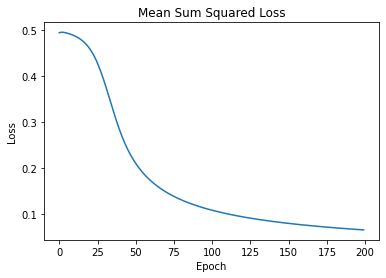

In [12]:
#Run a Script That Trains and Evaluate the Neural Network Model

train(input_train_scaled, output_train_scaled, 200)
predict(input_pred)
view_error_development()
test_evaluation(input_test_scaled, output_test_scaled)